# TCAD Augmented Machine Learning for Semiconductor Device Failure Troubleshooting and Reverse Engineering

## 1.0 Importing Essential Libraries

A section to import essential python libraries for data manipulation and model building 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


import os 
import sys 
sys.path.append(os.getcwd())
import helper_functions as hf 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection._split import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from random import randint

## 2.0 Importing Dataset

A section to import the dataset

In [2]:
diode_df = pd.read_csv('diode_data.csv')
diode_df.head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,n_thickness,i_thickness,p_thickness
0,-1.169430e-04,-1.083860e-04,-1.002770e-04,-9.260000e-05,-8.540000e-05,-7.850000e-05,-7.210000e-05,-6.610000e-05,-6.040000e-05,-5.520000e-05,...,0.503513,0.549209,0.596394,0.645018,0.695033,0.746390,0.799040,190.967,5.635,243.133
1,-3.920000e-05,-3.590000e-05,-3.280000e-05,-2.990000e-05,-2.720000e-05,-2.470000e-05,-2.240000e-05,-2.030000e-05,-1.830000e-05,-1.650000e-05,...,0.609367,0.663781,0.719810,0.777374,0.836394,0.896786,0.958464,206.695,7.002,150.171
2,-2.600000e-06,-2.300000e-06,-2.030000e-06,-1.790000e-06,-1.570000e-06,-1.370000e-06,-1.200000e-06,-1.040000e-06,-9.020000e-07,-7.780000e-07,...,0.629319,0.685540,0.743402,0.802818,0.863698,0.925948,0.989472,176.359,11.452,169.475
3,-3.930000e-07,-3.410000e-07,-2.950000e-07,-2.550000e-07,-2.190000e-07,-1.870000e-07,-1.590000e-07,-1.350000e-07,-1.140000e-07,-9.570000e-08,...,0.544376,0.593366,0.643861,0.695797,0.749108,0.803729,0.859591,172.952,14.514,223.855
4,-3.120000e-07,-2.690000e-07,-2.310000e-07,-1.980000e-07,-1.680000e-07,-1.430000e-07,-1.210000e-07,-1.010000e-07,-8.500000e-08,-7.080000e-08,...,0.443773,0.484255,0.526089,0.569238,0.613664,0.659330,0.706199,247.020,15.045,244.374


## 3.0 Data Profiling 

A section to get a better feel on the dataset

In [3]:
# shape of the data

# we have three target values in the dataset - n_thickness, p_thickness, i_thickness
target_values = 3

print("The dataset has {} features/current records for each 1D PIN Diode.".format(diode_df.shape[1] - target_values))
print("\nThe dataset has {} diode records with different thickness values.".format(diode_df.shape[0]))

The dataset has 102 features/current records for each 1D PIN Diode.

The dataset has 1854 diode records with different thickness values.


In [4]:
# information about the dataset - datatypes and memory usage

diode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Columns: 105 entries, 0 to p_thickness
dtypes: float64(105)
memory usage: 1.5 MB


In [5]:
# detailed distribution information of each numerical feature in the dataset

# As shown below, the features have difference of orders of magnitude 

diode_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1854.0,-0.000025,0.000037,-0.000196,-0.000031,-0.000007,-1.155000e-06,-9.990000e-08
1,1854.0,-0.000023,0.000034,-0.000182,-0.000028,-0.000006,-1.012500e-06,-8.500000e-08
2,1854.0,-0.000021,0.000032,-0.000168,-0.000026,-0.000005,-8.797500e-07,-7.200000e-08
3,1854.0,-0.000019,0.000029,-0.000155,-0.000023,-0.000005,-7.660000e-07,-6.080000e-08
4,1854.0,-0.000017,0.000027,-0.000143,-0.000021,-0.000004,-6.680000e-07,-5.110000e-08
...,...,...,...,...,...,...,...,...
100,1854.0,0.816149,0.082410,0.166431,0.758217,0.807275,8.653637e-01,1.059885e+00
101,1854.0,0.873022,0.087532,0.174092,0.811704,0.863750,9.251563e-01,1.132051e+00
n_thickness,1854.0,198.768833,28.944265,150.039000,173.850500,197.411500,2.229275e+02,2.509850e+02
i_thickness,1854.0,10.196279,3.096401,5.003000,7.628000,10.058000,1.269825e+01,1.599800e+01


In [6]:
# Checking null values in each feature in the dataset

# Shown below that the dataset doesnt have any null values 

diode_df.isnull().sum()

0              0
1              0
2              0
3              0
4              0
              ..
100            0
101            0
n_thickness    0
i_thickness    0
p_thickness    0
Length: 105, dtype: int64

In [7]:
## Splitting the target values from current value features 

n_thickness = diode_df['n_thickness']
p_thickness = diode_df['p_thickness']
i_thickness = diode_df['i_thickness']


# Dropping target features from the dataset
diode_df.drop(['n_thickness', 'p_thickness', 'i_thickness'], axis=1, inplace=True)

diode_df.shape


(1854, 102)

## 4.0 Feature Engineering 

A section to preprocess features 

### Quick Check -> Base Linear Regression Model with Raw Data

Base Linear Regression model to help us understand the base model performance

Training mean squared error:  1.5249952480673086
Testing mean squared error:  1.859728706466465


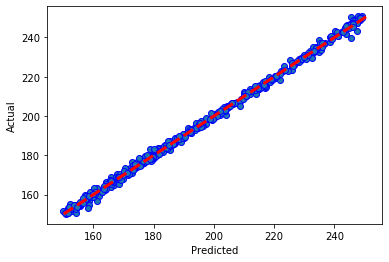

In [8]:
# Base Linear Regression for n_thickness prediction 

hf.base_linear_model(diode_df, n_thickness)

Training mean squared error:  1.1056574184100958
Testing mean squared error:  1.2225669547518796


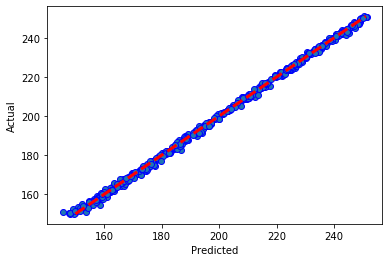

In [9]:
# Base Linear Regression for p_thickness prediction 

hf.base_linear_model(diode_df, p_thickness)

Training mean squared error:  0.053754805969062874
Testing mean squared error:  0.07206862993555883


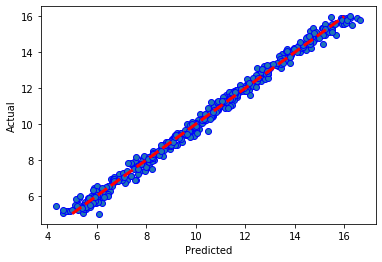

In [10]:
# Base Linear Regression for i_thickness prediction 

hf.base_linear_model(diode_df, i_thickness)

## 4.1 Checking Skewness of Features

In [11]:
# Checking skewness of each feature

"""

AS WE CAN SEE BELOW, THE FIRST 30 FEATURES ARE HIGHLY SKEWED THE LEFT. 

FEATURES 31 THROUGH 73 ARE NOT SKEWED AT ALL. 

ALL THE FEATURES AFTER 74 ARE SLIGHTLY SKEWED TO THE RIGHT.

"""

hf.check_skewness(diode_df)

Feature 0 skewness: -1.8707514378478616
Feature 1 skewness: -1.8888428977813685
Feature 2 skewness: -1.9072573864421445
Feature 3 skewness: -1.9259261732936008
Feature 4 skewness: -1.9450932782384691
Feature 5 skewness: -1.964720636415891
Feature 6 skewness: -1.9844826278694319
Feature 7 skewness: -2.004812313354069
Feature 8 skewness: -2.0252116472644133
Feature 9 skewness: -2.0463156598826333
Feature 10 skewness: -2.067896744762891
Feature 11 skewness: -2.090155486296328
Feature 12 skewness: -2.1124143880902224
Feature 13 skewness: -2.1355060921015148
Feature 14 skewness: -2.1589111178115434
Feature 15 skewness: -2.1835528842083125
Feature 16 skewness: -2.2082901074058285
Feature 17 skewness: -2.233849438815332
Feature 18 skewness: -2.259320066902415
Feature 19 skewness: -2.2855782866246943
Feature 20 skewness: -2.312806783472329
Feature 21 skewness: -2.340746361308405
Feature 22 skewness: -2.369712325850548
Feature 23 skewness: -2.397857792923708
Feature 24 skewness: -2.427579744270

### 4.1.1. Confirm Skewness using visualization 

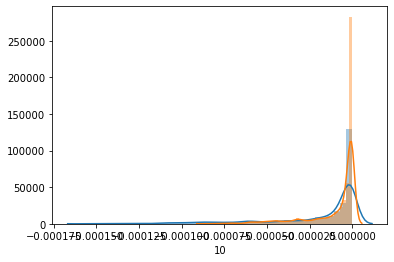

In [12]:
# Checking the first group of features higly skewed to the right

sns.distplot(diode_df['3']);
sns.distplot(diode_df['10']);


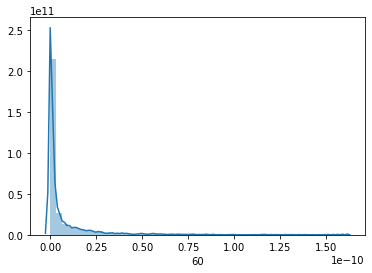

In [13]:
# Checking the second group of features not skewed at all as shown below

sns.distplot(diode_df['60']);

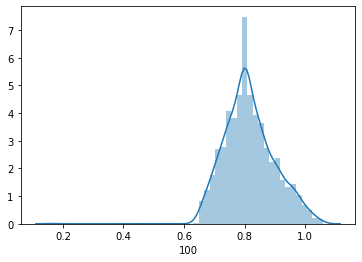

In [14]:
#Checking the third group of features slightly skewed to the right 

sns.distplot(diode_df['100'])

In [15]:
"""


MY VISUAL CONFIRMATION RESULTS:

FEATURES 0 - 50 : LEFT SKEWED 
FEATURES 51 - 65: RIGHT SKEWED 
FEATURES 66 - 101: NO SIGNIFICANT SKEWNESS


"""

diode_df.shape

(1854, 102)

## 4.2 Feature Transformation 

A section to transform features to avoid skewness for better results

### 4.2.1 Log Transformation 

Logarithmically Transforming features to avoid skewness 

In [16]:
# Log transformation 

# Adding 1 to all the current values to handle negative current values 

log_diode_df = pd.DataFrame(np.log(diode_df+1), index=diode_df.index, columns=diode_df.columns)

log_diode_df.head()


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-1.169498e-04,-1.083919e-04,-1.002820e-04,-9.260429e-05,-8.540365e-05,-7.850308e-05,-7.210260e-05,-6.610218e-05,-6.040182e-05,-5.520152e-05,...,0.319071,0.348388,0.377994,0.407804,0.437745,0.467747,0.497751,0.527702,0.557551,0.587253
1,-3.920077e-05,-3.590064e-05,-3.280054e-05,-2.990045e-05,-2.720037e-05,-2.470031e-05,-2.240025e-05,-2.030021e-05,-1.830017e-05,-1.650014e-05,...,0.376093,0.409252,0.442533,0.475841,0.509093,0.542214,0.575137,0.607804,0.640161,0.672161
2,-2.600003e-06,-2.300003e-06,-2.030002e-06,-1.790002e-06,-1.570001e-06,-1.370001e-06,-1.200001e-06,-1.040001e-06,-9.020004e-07,-7.780003e-07,...,0.386183,0.420118,0.454144,0.488162,0.522086,0.555839,0.589351,0.622563,0.655418,0.687869
3,-3.930001e-07,-3.410001e-07,-2.950000e-07,-2.550000e-07,-2.190000e-07,-1.870000e-07,-1.590000e-07,-1.350000e-07,-1.140000e-07,-9.570000e-08,...,0.341515,0.372369,0.403433,0.434620,0.465848,0.497047,0.528153,0.559106,0.589856,0.620356
4,-3.120000e-07,-2.690000e-07,-2.310000e-07,-1.980000e-07,-1.680000e-07,-1.430000e-07,-1.210000e-07,-1.010000e-07,-8.500000e-08,-7.080000e-08,...,0.285810,0.312636,0.339812,0.367260,0.394913,0.422708,0.450590,0.478507,0.506414,0.534268


In [17]:
# Quick dataset check 

log_diode_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1854.0,-0.000025,0.000037,-0.000196,-0.000031,-0.000007,-1.155001e-06,-9.990001e-08
1,1854.0,-0.000023,0.000034,-0.000182,-0.000028,-0.000006,-1.012501e-06,-8.500000e-08
2,1854.0,-0.000021,0.000032,-0.000168,-0.000026,-0.000005,-8.797504e-07,-7.200000e-08
3,1854.0,-0.000019,0.000029,-0.000155,-0.000023,-0.000005,-7.660003e-07,-6.080000e-08
4,1854.0,-0.000017,0.000027,-0.000143,-0.000021,-0.000004,-6.680002e-07,-5.110000e-08
...,...,...,...,...,...,...,...,...
97,1854.0,0.502082,0.040635,0.134326,0.473625,0.498510,5.270218e-01,6.162017e-01
98,1854.0,0.533451,0.042344,0.140834,0.503921,0.529760,5.593819e-01,6.521547e-01
99,1854.0,0.564670,0.043949,0.147384,0.534156,0.560893,5.915320e-01,6.876565e-01
100,1854.0,0.595688,0.045448,0.153949,0.564300,0.591820,6.234561e-01,7.226504e-01


In [18]:
# Checking skewness after log transformation

# As shown below, after log transformation [By adding 1 to every feature], doesnt make much difference to skewness of the data

hf.check_skewness(log_diode_df)

Feature 0 skewness: -1.870825289753484
Feature 1 skewness: -1.88891194636858
Feature 2 skewness: -1.9073218518549473
Feature 3 skewness: -1.925986260511796
Feature 4 skewness: -1.9451492222144553
Feature 5 skewness: -1.9647726392705507
Feature 6 skewness: -1.9845308804018342
Feature 7 skewness: -2.0048569999911616
Feature 8 skewness: -2.0252529647262842
Feature 9 skewness: -2.0463537906067364
Feature 10 skewness: -2.0679318972189873
Feature 11 skewness: -2.0901878224617363
Feature 12 skewness: -2.1124440493814047
Feature 13 skewness: -2.135533268863995
Feature 14 skewness: -2.1589359659900955
Feature 15 skewness: -2.1835755775638765
Feature 16 skewness: -2.208310766950443
Feature 17 skewness: -2.23386820473718
Feature 18 skewness: -2.2593370679195792
Feature 19 skewness: -2.2855936393959317
Feature 20 skewness: -2.3128206227602193
Feature 21 skewness: -2.3407588106348163
Feature 22 skewness: -2.3697234940960707
Feature 23 skewness: -2.3978677626367384
Feature 24 skewness: -2.4275886180

### Quick Check - Base Linear Regression Model 

Checking linear regression with transformed data - expected to improve

Training mean squared error:  0.9642445943999296
Testing mean squared error:  1.0904373180486056


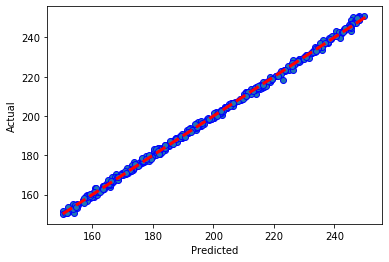

In [19]:
# As we can see below - the model has shown significant improvement in mse values for predicting n_thickness

hf.base_linear_model(log_diode_df, n_thickness)

Training mean squared error:  1.1960304044347163
Testing mean squared error:  1.38064418489026


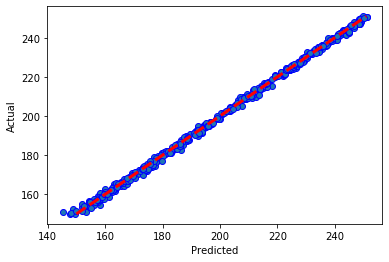

In [20]:
# As we can see below - unfortunately, the model shows reduced performance in mse values for predicting p_thickness

hf.base_linear_model(log_diode_df, p_thickness)

Training mean squared error:  0.059093710860190704
Testing mean squared error:  0.08480810068494184


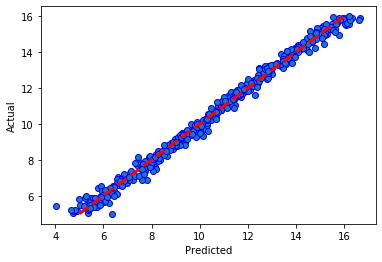

In [21]:
# As we can see below - the model is showing almost the same performance when compared 

hf.base_linear_model(log_diode_df, i_thickness)

## 4.2.2 Log Transformation X Square Transformation

In [22]:
# Transforming features.  

#   Square and Log transformation 

sqrd_log_diode_df = pd.DataFrame(np.log(diode_df**2))

In [23]:
# Checking skewness of the data after later transformation

hf.check_skewness(sqrd_log_diode_df)

Feature 0 skewness: -0.13118884578529452
Feature 1 skewness: -0.13101536038374686
Feature 2 skewness: -0.1308954292932725
Feature 3 skewness: -0.13081819212637896
Feature 4 skewness: -0.13078281103186457
Feature 5 skewness: -0.13066855345123643
Feature 6 skewness: -0.13078446877536473
Feature 7 skewness: -0.130766214697125
Feature 8 skewness: -0.13083756610630767
Feature 9 skewness: -0.13088048319636986
Feature 10 skewness: -0.13102142431565034
Feature 11 skewness: -0.13116982446458042
Feature 12 skewness: -0.13142718706674603
Feature 13 skewness: -0.13161369486692615
Feature 14 skewness: -0.1319016887846587
Feature 15 skewness: -0.13221485190566276
Feature 16 skewness: -0.13267460195524494
Feature 17 skewness: -0.13307740670917134
Feature 18 skewness: -0.13354475142407451
Feature 19 skewness: -0.13406646841087322
Feature 20 skewness: -0.13468876645956673
Feature 21 skewness: -0.13525349060475225
Feature 22 skewness: -0.1359976923559373
Feature 23 skewness: -0.13678312725210554
Feature

Training mean squared error:  0.8571531670101096
Testing mean squared error:  1.0802126581236062


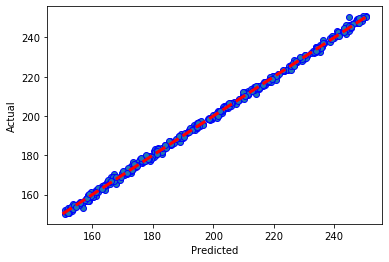

In [24]:
# Shown below is enhanced base model performance on transformed data

hf.base_linear_model(sqrd_log_diode_df, n_thickness)

Training mean squared error:  0.666983426820005
Testing mean squared error:  0.8947277494353076


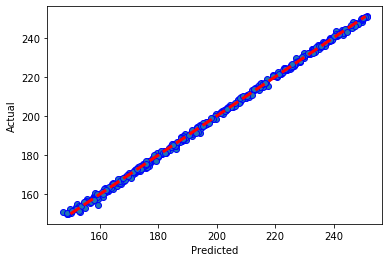

In [25]:
# p_thickness prediction is shown boosted due to transformed data

hf.base_linear_model(sqrd_log_diode_df, p_thickness)

Training mean squared error:  0.02623947424099613
Testing mean squared error:  0.03290293882707376


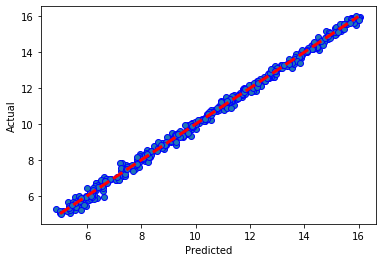

In [26]:
# The base model is showing significant enhancement on predicting i_thickness

hf.base_linear_model(sqrd_log_diode_df, i_thickness)

## 5.0 Model Building 

A section to build models to predict n_thickness, p_thickness, and i_thickness

In [27]:
# Splitting the data into train and validation for n_thickness target

X_train, X_validation, y_train, y_validation = train_test_split(sqrd_log_diode_df, n_thickness, test_size = 0.25, random_state = 42, shuffle = True)

### 5.1 Linear Regression 

Training mean squared error:  0.8571531670101096
Testing mean squared error:  1.0802126581236062


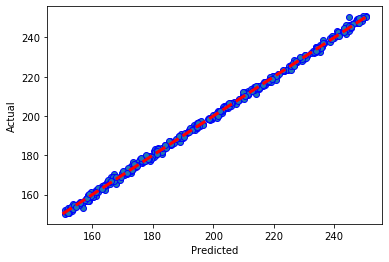

In [29]:
# Simple linear regression prediction performance on n_thickness parameter

hf.base_linear_model(sqrd_log_diode_df, n_thickness)

Training mean squared error:  0.666983426820005
Testing mean squared error:  0.8947277494353076


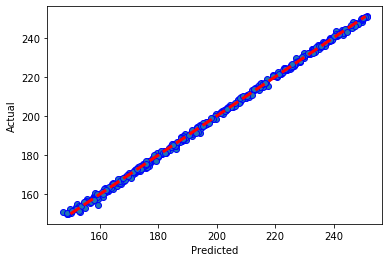

In [30]:
# Simple linear regression prediction performance on p_thickness parameter

hf.base_linear_model(sqrd_log_diode_df, p_thickness)

Training mean squared error:  0.02623947424099613
Testing mean squared error:  0.03290293882707376


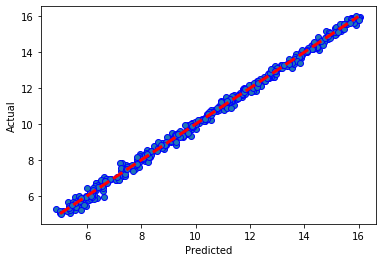

In [31]:
# Simplle linear regression prediction performance on i_thickness

hf.base_linear_model(sqrd_log_diode_df, i_thickness)

In [33]:
"""

As shown in the above simple linear regression model, 

The linear regression model has very good prediction performance on all parameters of 1D PIN Diode

""";

### 5.2 Decision Tree

In [34]:
# TRYING A MORE COMPLEX MODEL - DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [35]:
# Conducting predictions for training and validation 

t_pred_tree = tree_reg.predict(X_train)
y_pred_tree = tree_reg.predict(X_validation)

In [36]:
# Evaluating preformance on both training and validation 

tree_train_mse = mean_squared_error(y_train ,t_pred_tree)
tree_test_mse = mean_squared_error(y_validation, y_pred_tree)

print("Training mean square error for base Decision Tree Model: {}".format(tree_train_mse))
print("\nTesting mean square error for base Decision Tree Model: {}".format(tree_test_mse))

Training mean square error for base Decision Tree Model: 0.0

Testing mean square error for base Decision Tree Model: 300.17112149784487


In [37]:
"""

CLEARLY SHOWN FROM THE ABOVE RESULT THAT DECISION TREE MODEL HAS HIGHLY OVERFIT TO THE DATA

""";

### 5.3 Random Forest Model

In [38]:


forest_reg = RandomForestRegressor(random_state=42)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
# predicting training and validation for n_thickness 

y_pred_forest = forest_reg.predict(X_validation)
t_pred_forest = forest_reg.predict(X_train)

In [40]:
# Evaluating performance on both training and validation 

test_mse_forest = mean_squared_error(y_validation, y_pred_forest)
train_mse_forest = mean_squared_error(y_train, t_pred_forest)


print("Training mean square error for base Random Forest Tree Model: {}".format(test_mse_forest))
print("\nTesting mean square error for base Random Forest Tree Model: {}".format(train_mse_forest))

Training mean square error for base Random Forest Tree Model: 161.2165617803186

Testing mean square error for base Random Forest Tree Model: 24.17172509365992


In [41]:
"""

AS SHOWN FROM THE ABOVE RESULT, RANDOM FOREST IS NOT PERFORMING WELL ON PREDICTING n_thickness. 

""";

### 5.4 MLP Regressor

In [42]:
# Building a base MLP Regressor model

mlp_model = MLPRegressor(validation_fraction = 0, solver='lbfgs', max_iter= 10000)

# Fitting training dataset into th mlp model 
mlp_model.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0, verbose=False,
             warm_start=False)

In [44]:
# Predicting n_thickness using mlp regressor

t_pred_mlp = mlp_model.predict(X_train)
y_pred_mlp = mlp_model.predict(X_validation)

In [45]:
# Evaluating mlp regressor performance on both training and validation n_thickness prediction 

train_mse_mlp = mean_squared_error(y_train, t_pred_mlp)
test_mse_mlp = mean_squared_error(y_validation, y_pred_mlp)

print("Training mean squared error: ", train_mse_mlp)
print("\nTesting mean squared error: ", test_mse_mlp)

Training mean squared error:  182.2661552130491

Testing mean squared error:  205.4079066115557


In [46]:
"""

AS SHOWN ABOVE, MLP REGRESSOR MODEL IS NOT HAVING GOOD PERFORMACE ON PREDICTING n_thickness.

""";